In [208]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from statsmodels.sandbox.stats.multicomp import multipletests

In [209]:
def process(categories, categories_rand, names):
    CTEs = [np.mean(c) for c in categories]
    CTEs_rand = [np.mean(c) for c in categories_rand]
    error = [np.std(c) for c in categories]
    error_rand = [np.std(c) for c in categories_rand]
    x_pos = np.arange(len(categories))*5
    return CTEs, CTEs_rand, error, error_rand, x_pos

In [210]:
# Build the plot
def build_plot(CTEs, CTEs_rand, error, error_rand, x_pos, names, pvals_corrected, title, leg_loc):
    plt.rc('font', size=20)
    fig, ax = plt.subplots()
    fig.set_size_inches(16, 8)
    plt.yticks(np.arange(0, 1, 0.1))
    ax.bar(x_pos, CTEs, yerr=error, align='center', color='blue', alpha=0.8, ecolor='black', capsize=20, width=2)
    ax.bar(x_pos+2, CTEs_rand, yerr=error_rand, align='center', color='red', alpha=0.8, ecolor='black', capsize=20, width=2)
    ax.set_ylabel('AUC')
    ax.set_xticks(x_pos+1)
    ax.set_xticklabels(names)
    ax.set_title(title)
    ax.yaxis.grid(True)
    ax.legend(['Model', 'Random'], loc=leg_loc)
    ax.patches
    i = 0
    for p, pval in zip(ax.patches, pvals_corrected):
        if pval < 0.001:
            ax.text(p.get_x() + p.get_width() / 2., p.get_height() + error[i], '***', ha='center')
            #ax.axvline(p.get_x() + p.get_width() / 2., lw=0.5)
            i += 1
            continue
        if pval < 0.01:
            ax.text(p.get_x() + p.get_width() / 2., p.get_height() + error[i], '**', ha='center')
            #ax.axvline(p.get_x() + p.get_width() / 2., lw=0.5)
            i += 1
            continue
        if pval < 0.05:
            ax.text(p.get_x() + p.get_width() / 2., p.get_height() + error[i], '*', ha='center')
            #ax.axvline(p.get_x() + p.get_width() / 2., lw=0.5)
            i += 1
            continue
        # ax.text(p.get_x() + p.get_width() / 2., p.get_height(), 'n.s.', ha='center')
        i += 1
    # Save the figure and show
    # plt.tight_layout()
    # plt.savefig('bar_plot_with_error_bars.png')
    plt.show()
    return

In [211]:
def ttest(names, categories, categories_rand):
    pvals = []
    for r, u, v in zip(names, categories, categories_rand):
        print(r,':')
        t_stat = stats.ttest_ind(u, v).statistic
        pval = stats.ttest_ind(u, v).pvalue / 2
        print('t-statistic:', t_stat, 'p-value:', pval)
        pvals.append(pval)
    # Create a list of the adjusted p-values
    reject, pvals_corrected, alphacSidak, alphacBonf = multipletests(pvals, alpha=0.05, method='bonferroni') 
    print("Bonferroni:\n")
    print("Reject:", reject)
    print("pvals corrected:", pvals_corrected)
    reject, pvals_corrected, alphacSidak, alphacBonf = multipletests(pvals, alpha=0.05, method='fdr_bh') # Benjamini/Hochberg
    print("Benjamini/Hochberg:\n")
    print("Reject:", reject)
    print("pvals corrected:", pvals_corrected)
    return pvals_corrected

In [212]:
# CSI1
vehicle_fine =[[0.58125, 0.7691198, 0.79435486, 0.6108742], [0.6608266, 0.6815733, 0.5833334, 0.62251985],
               [0.72161174, 0.71111107, 0.7071429, 0.5750315], [0.6396198, 0.4695562, 0.51960784, 0.4989339],
               [0.68824404, 0.5269397, 0.60718787, 0.6760684], [0.64285713, 0.7368421, 0.7398437, 0.6929687],
               [0.76612896, 0.6329365, 0.6181818, 0.6516172], [0.75111115, 0.49999997, 0.5625, 0.6051136]]
vehicle_fine_rand = [[0.54080886, 0.52886, 0.6922043, 0.47547978], [0.63791555, 0.46012932, 0.4779762, 0.35813493],
                     [0.6021978, 0.691453, 0.5488095, 0.5081967], [0.5855263, 0.51238394, 0.42208463, 0.36140728],
                     [0.55543154, 0.5414871, 0.55674654, 0.67948717], [0.48251486, 0.5954592, 0.44765627, 0.39609376],
                     [0.5062724, 0.34325397, 0.5151515, 0.32749325], [0.4088889, 0.6875, 0.875, 0.3096591]]

animal_fine = [[0.6481482, 0.6421121, 0.60411906, 0.63349515], [0.69393593, 0.69372153, 0.6923544, 0.610698],
               [0.5675058, 0.5255367, 0.7754121, 0.56664205], [0.58093864, 0.6166886, 0.6203704, 0.61058205],
               [0.6941799, 0.57110393, 0.6571602, 0.65031403], [0.61043954, 0.56400263, 0.72712415, 0.72743064],
               [0.6039683, 0.63265973, 0.61603767, 0.5378473], [0.5667293, 0.5735931, 0.5890411, 0.5961538]]

animal_fine_rand =[[0.53225803, 0.5159713, 0.5700801, 0.47633496], [0.56607556, 0.51838, 0.523665, 0.49313504],
                   [0.62871855, 0.5439167, 0.39423078, 0.4425626], [0.6036877, 0.5246873, 0.5887799, 0.5436508],
                   [0.5275132, 0.49902597, 0.40716022, 0.5769231], [0.5348901, 0.49106565, 0.6840959, 0.66215277],
                   [0.46031743, 0.4180248, 0.31037736, 0.48020834], [0.4520677, 0.5530303, 0.66438353, 0.48387098]]

food_fine = [[0.8714286, 0.51863354, 0.65086204, 0.7650862], [0.54365075, 0.46031746, 0.5870371, 0.6538462],
             [0.6394231, 0.6040373, 0.6025641, 0.659375], [0.5261905, 0.39166665, 0.66379315, 0.6537267],
             [0.6433823, 0.53333336, 0.5952381, 0.5119047], [0.6691176, 0.5566667, 0.5892858, 0.5238095]]

food_fine_rand = [[0.52619046, 0.7111801, 0.4267241, 0.5344828], [0.6587302, 0.484127, 0.5407407, 0.63286716],
                  [0.48878208, 0.53260875, 0.5032052, 0.27500004], [0.38571426, 0.3516667, 0.43318966, 0.38509315],
                  [0.49632353, 0.44666666, 0.53571427, 0.2916667], [0.5036765, 0.63666666, 0.52380955, 0.17857142]]

tool_fine =[[0.69545454, 0.57526875, 0.43548387, 0.7661291], [0.68703705, 0.40734267, 0.5192308, 0.43548387],
            [0.7099359, 0.7047414, 0.81666666, 0.5537634], [0.5833334, 0.5913979, 0.5857143, 0.70625],
            [0.61755955, 0.7214286, 0.67741936, 0.76508623], [0.6, 0.6880952, 0.78571427, 0.7392241],
            [0.599359, 0.621875, 0.7392473, 0.6451613], [0.6888889, 1.0, 0.6969697, 0.7692307]]

tool_fine_rand = [[0.5727273, 0.59408605, 0.47580647, 0.50268817], [0.55370367, 0.59790206, 0.30944058, 0.6182796],
                  [0.70512825, 0.5603448, 0.57962966, 0.7419355], [0.35818714, 0.28763443, 0.25714287, 0.496875],
                  [0.47767854, 0.23571427, 0.32795703, 0.3987069], [0.49814814, 0.4738095, 0.5257937, 0.62931037],
                  [0.52403843, 0.53437495, 0.40053767, 0.7069892], [0.7, 0.3076923, 0.43939394, 1.0]]

car :
t-statistic: 4.160484728553303 p-value: 0.0004808604758638825
airplane :
t-statistic: 1.4447581123120188 p-value: 0.08526716579828146
train :
t-statistic: 1.1886233241211586 p-value: 0.12717994576537847
boat :
t-statistic: 3.8954093806795997 p-value: 0.0008081467525797254
Bonferroni:

Reject: [ True False False  True]
pvals corrected: [0.00192344 0.34106866 0.50871978 0.00323259]
Benjamini/Hochberg:

Reject: [ True False False  True]
pvals corrected: [0.00161629 0.11368955 0.12717995 0.00161629]


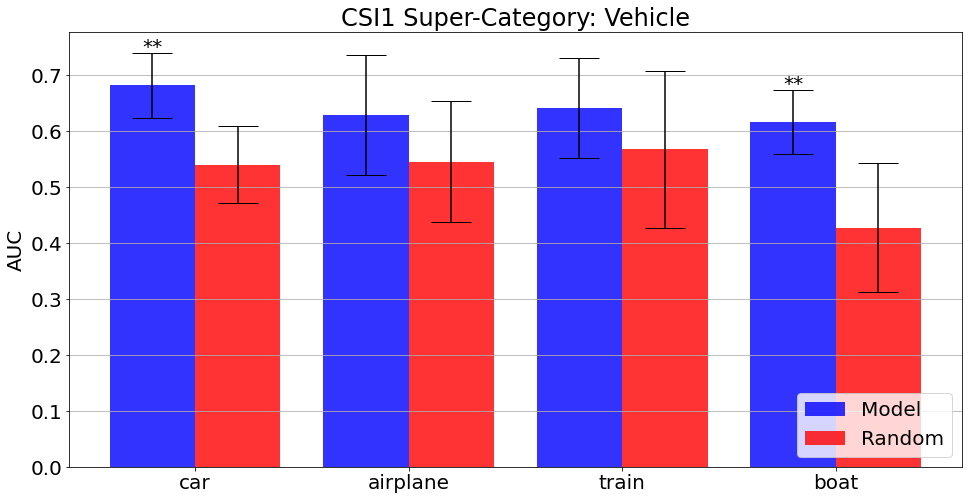

In [213]:
#names = ['bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat']
names = ['car', 'airplane', 'train', 'boat']
categories, categories_rand = vehicle_fine, vehicle_fine_rand
vehicle1_fine, vehicle1_fine_rand = vehicle_fine, vehicle_fine_rand
categories, categories_rand = np.transpose(categories), np.transpose(categories_rand)
CTEs, CTEs_rand, error, error_rand, x_pos = process(categories, categories_rand, names)
pvals_corrected = ttest(names, categories, categories_rand)
build_plot(CTEs, CTEs_rand, error, error_rand, x_pos, names, pvals_corrected,
           'CSI1 Super-Category: Vehicle', 'lower right')

bird :
t-statistic: 2.8758706605744875 p-value: 0.0061051814745594546
dog :
t-statistic: 3.9216533827258835 p-value: 0.0007674747830663056
horse :
t-statistic: 2.679843775432803 p-value: 0.008975509037080663
giraffe :
t-statistic: 2.996904657218657 p-value: 0.004805145541380801
Bonferroni:

Reject: [ True  True  True  True]
pvals corrected: [0.02442073 0.0030699  0.03590204 0.01922058]
Benjamini/Hochberg:

Reject: [ True  True  True  True]
pvals corrected: [0.00814024 0.0030699  0.00897551 0.00814024]


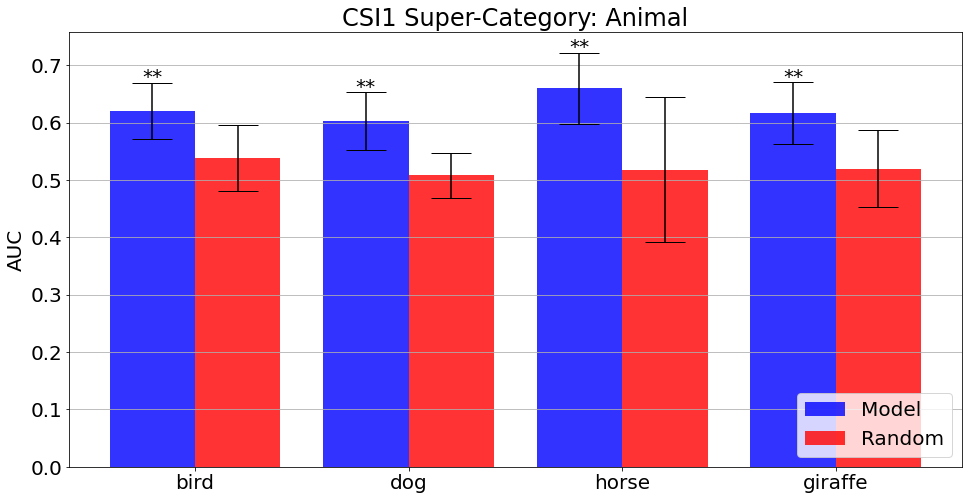

In [214]:
#names = ['bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe']
names = ['bird', 'dog', 'horse', 'giraffe']
categories, categories_rand = animal_fine, animal_fine_rand
animal1_fine, animal1_fine_rand = animal_fine, animal_fine_rand
categories, categories_rand = np.transpose(categories), np.transpose(categories_rand)
CTEs, CTEs_rand, error, error_rand, x_pos = process(categories, categories_rand, names)
pvals_corrected = ttest(names, categories, categories_rand)
build_plot(CTEs, CTEs_rand, error, error_rand, x_pos, names, pvals_corrected, 'CSI1 Super-Category: Animal', 'lower right')

banana :
t-statistic: 2.247481009757827 p-value: 0.024193044740889083
orange :
t-statistic: -0.2666971011558669 p-value: 0.39756060403810284
broccoli :
t-statistic: 4.832508721369794 p-value: 0.00034459185131255137
pizza :
t-statistic: 3.0576869990972178 p-value: 0.006046046745998139
Bonferroni:

Reject: [False False  True  True]
pvals corrected: [0.09677218 1.         0.00137837 0.02418419]
Benjamini/Hochberg:

Reject: [ True False  True  True]
pvals corrected: [0.03225739 0.3975606  0.00137837 0.01209209]


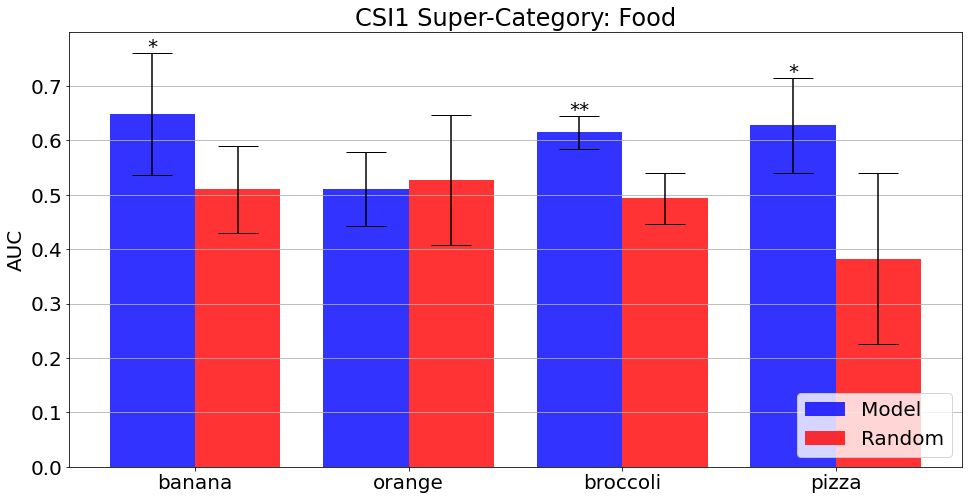

In [215]:
# names = ['banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog','pizza', 'donut', 'cake']
names = ['banana', 'orange', 'broccoli','pizza']
categories, categories_rand = food_fine, food_fine_rand
food1_fine, food1_fine_rand = food_fine, food_fine_rand
categories, categories_rand = np.transpose(categories), np.transpose(categories_rand)
CTEs, CTEs_rand, error, error_rand, x_pos = process(categories, categories_rand, names)
pvals_corrected = ttest(names, categories, categories_rand)
build_plot(CTEs, CTEs_rand, error, error_rand, x_pos, names, pvals_corrected, 'CSI1 Super-Category: Food', 'lower right')


handbag :
t-statistic: 2.2182649208370577 p-value: 0.02179035567791268
baseball bat :
t-statistic: 2.7009925866357944 p-value: 0.008611569538282002
baseball glove :
t-statistic: 3.9475763488374587 p-value: 0.0007293447364923485
tennis racket :
t-statistic: 0.4541816241899196 p-value: 0.32832989761221726
Bonferroni:

Reject: [False  True  True False]
pvals corrected: [0.08716142 0.03444628 0.00291738 1.        ]
Benjamini/Hochberg:

Reject: [ True  True  True False]
pvals corrected: [0.02905381 0.01722314 0.00291738 0.3283299 ]


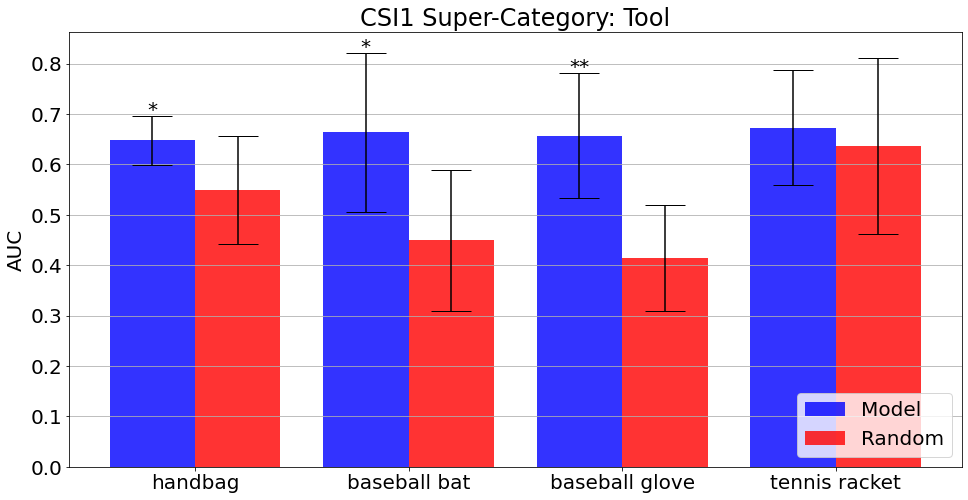

In [216]:
names = ['handbag', 'baseball bat', 'baseball glove', 'tennis racket']
categories, categories_rand = tool_fine, tool_fine_rand
tool1_fine, tool1_fine_rand = tool_fine, tool_fine_rand
categories, categories_rand = np.transpose(categories), np.transpose(categories_rand)
CTEs, CTEs_rand, error, error_rand, x_pos = process(categories, categories_rand, names)
pvals_corrected = ttest(names, categories, categories_rand)
build_plot(CTEs, CTEs_rand, error, error_rand, x_pos, names, pvals_corrected, 'CSI1 Super-Category: Tool', 'lower right')

In [217]:
# CSI2
vehicle_fine = [[0.61732453, 0.5514124, 0.56949145, 0.515457], [0.5745069, 0.5151515, 0.70043105, 0.6626344],
                [0.49741313, 0.4682112, 0.6037152, 0.5948718], [0.6005117, 0.57327586, 0.6147541, 0.48125002],
                [0.6147661, 0.63954747, 0.72821975, 0.6664565], [0.5197224, 0.53809524, 0.6033898, 0.52485883], 
                [0.52399683, 0.41122994, 0.58537954, 0.61997014], [0.5272109, 0.53571427, 0.53846157, 0.64666665]]
vehicle_fine_rand = [[0.49488303, 0.6135593, 0.49096048, 0.43346775], [0.5094959, 0.43867242, 0.44288793, 0.62231183],
                     [0.3954176, 0.4391164, 0.46749225, 0.67008543], [0.4170322, 0.42510775, 0.46595207, 0.38671875],
                     [0.53070176, 0.4919181, 0.4782197, 0.7313998], [0.531775, 0.4684524, 0.54180795, 0.580226], 
                     [0.5605822, 0.47807488, 0.51004463, 0.5014903], [0.6190476, 0.5153061, 0.47008547, 0.44666666]]

animal_fine = [[0.56250006, 0.53910816, 0.5625, 0.4363178], [0.5818182, 0.5897058, 0.3652174, 0.6507937],
               [0.57023805, 0.6330129, 0.6553571, 0.5007813], [0.60620636, 0.6217106, 0.41098487, 0.51704544],
               [0.54047626, 0.6026515, 0.41299018, 0.6103896], [0.60952383, 0.68238306, 0.49843746, 0.6632769],
               [0.563492, 0.6067709, 0.51172704, 0.65435606], [0.4324324, 0.49142155, 0.5614036, 0.660606]]
animal_fine_rand = [[0.46011904, 0.4736842, 0.5367188, 0.48234552], [0.54641145, 0.51323533, 0.48550728, 0.43650794], 
                    [0.48214287, 0.5420673, 0.40535715, 0.52421874], [0.5751748, 0.59466374, 0.5511364, 0.6979167], 
                    [0.49761903, 0.47121212, 0.4154412, 0.567821], [0.32738096, 0.47843567, 0.4546875, 0.5542373], 
                    [0.54761904, 0.6026786, 0.46162048, 0.6089015], [0.62837833, 0.1973039, 0.31140354, 0.4227273]]

food_fine =[[0.39596274, 0.5409091, 0.40238094, 0.56468534], [0.3360215, 0.61024845, 0.62267077, 0.36904764],
            [0.5603448, 0.55244756, 0.5681819, 0.41433567], [0.493007, 0.65838504, 0.6056034, 0.4027778],
            [0.472028, 0.6708074, 0.58836204, 0.39087301], [0.4125, 0.35000002, 0.21666668, 0.45454544]]
food_fine_rand = [[0.621118, 0.4545455, 0.46904764, 0.5926573], [0.44623658, 0.6630435, 0.6506211, 0.5595238],
                  [0.40301722, 0.4562937, 0.65209794, 0.6048951], [0.6625874, 0.46583852, 0.5840517, 0.35714287],
                  [0.55419576, 0.46118012, 0.5021552, 0.5357143], [0.2625, 0.3625, 0.8, 1.0]]

tool_fine = [[0.622807, 0.3922414, 0.38492063, 0.5625], [0.68939394, 0.6057692, 0.66506404, 0.6333333],
             [0.64434516, 0.590625, 0.5926573, 0.60370374], [0.6823529, 0.52182543, 0.6607143, 0.45555556],
             [0.6397059, 0.5019842, 0.67261904, 0.4611111], [0.6424242, 0.50625, 0.37896827, 0.65000004],
             [0.6923077, 0.48684207, 0.44444445, 0.48245612], [0.70833325, 0.51754385, 0.44444445, 0.4385965]]
tool_fine_rand = [[0.69736844, 0.5387931, 0.4404762, 0.4956897], [0.5651516, 0.34455127, 0.34294873, 0.4166667],
                  [0.4389881, 0.34375, 0.45104894, 0.5092593], [0.47941178, 0.50595236, 0.45634925, 0.43333334],
                  [0.57500005, 0.48809525, 0.61111116, 0.5074074], [0.6515152, 0.33125, 0.4087302, 0.625],
                  [0.47435898, 0.7061404, 0.3968254, 0.5219298], [0.6666666, 0.49122804, 0.34126985, 0.5701754]]

car :
t-statistic: 1.6869291301585987 p-value: 0.056880942880243354
airplane :
t-statistic: 1.405170662568533 p-value: 0.09088542750981089
train :
t-statistic: 5.32921368138468 p-value: 5.319109857269727e-05
boat :
t-statistic: 0.8390196410441455 p-value: 0.2077776518124793
Bonferroni:

Reject: [False False  True False]
pvals corrected: [2.27523772e-01 3.63541710e-01 2.12764394e-04 8.31110607e-01]
Benjamini/Hochberg:

Reject: [False False  True False]
pvals corrected: [0.11376189 0.12118057 0.00021276 0.20777765]


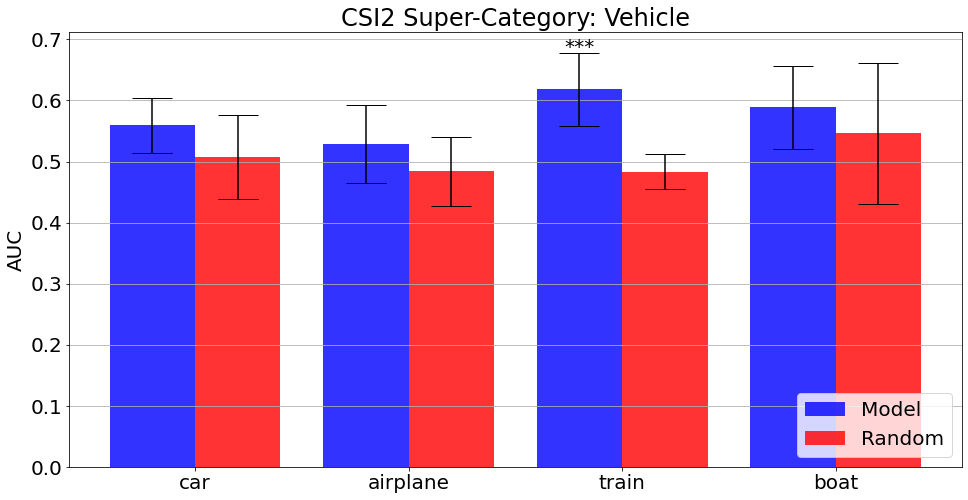

In [218]:
names = ['car', 'airplane', 'train', 'boat']
categories, categories_rand = vehicle_fine, vehicle_fine_rand
vehicle2_fine, vehicle2_fine_rand = vehicle_fine, vehicle_fine_rand
categories, categories_rand = np.transpose(categories), np.transpose(categories_rand)
CTEs, CTEs_rand, error, error_rand, x_pos = process(categories, categories_rand, names)
pvals_corrected = ttest(names, categories, categories_rand)
build_plot(CTEs, CTEs_rand, error, error_rand, x_pos, names, pvals_corrected,
           'CSI2 Super-Category: Vehicle', 'lower right')

bird :
t-statistic: 1.3326357531887447 p-value: 0.10196780052111708
dog :
t-statistic: 2.2587012123615042 p-value: 0.020192747950141164
horse :
t-statistic: 1.0198837250626018 p-value: 0.16254264558442227
giraffe :
t-statistic: 1.104919007577437 p-value: 0.14391130137850444
Bonferroni:

Reject: [False False False False]
pvals corrected: [0.4078712  0.08077099 0.65017058 0.57564521]
Benjamini/Hochberg:

Reject: [False False False False]
pvals corrected: [0.16254265 0.08077099 0.16254265 0.16254265]


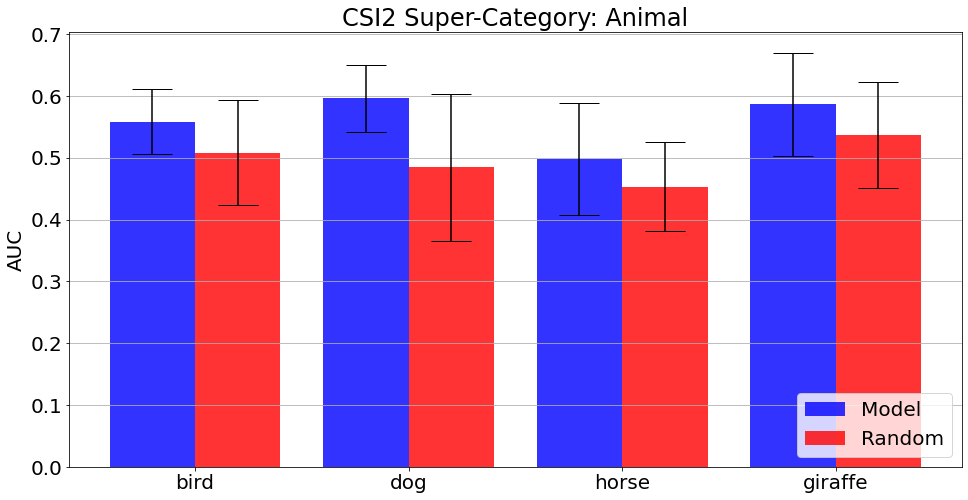

In [219]:
names = ['bird', 'dog', 'horse', 'giraffe']
categories, categories_rand = animal_fine, animal_fine_rand
animal2_fine, animal2_fine_rand = animal_fine, animal_fine_rand
categories, categories_rand = np.transpose(categories), np.transpose(categories_rand)
CTEs, CTEs_rand, error, error_rand, x_pos = process(categories, categories_rand, names)
pvals_corrected = ttest(names, categories, categories_rand)
build_plot(CTEs, CTEs_rand, error, error_rand, x_pos, names, pvals_corrected, 'CSI2 Super-Category: Animal', 'lower right')

banana :
t-statistic: -0.6730765251293219 p-value: 0.25807554852834624
orange :
t-statistic: 1.3805865737622767 p-value: 0.09874075119562446
broccoli :
t-statistic: -1.3346763488828068 p-value: 0.1057867704560236
pizza :
t-statistic: -1.92625577290089 p-value: 0.0414732888973502
Bonferroni:

Reject: [False False False False]
pvals corrected: [1.         0.394963   0.42314708 0.16589316]
Benjamini/Hochberg:

Reject: [False False False False]
pvals corrected: [0.25807555 0.14104903 0.14104903 0.14104903]


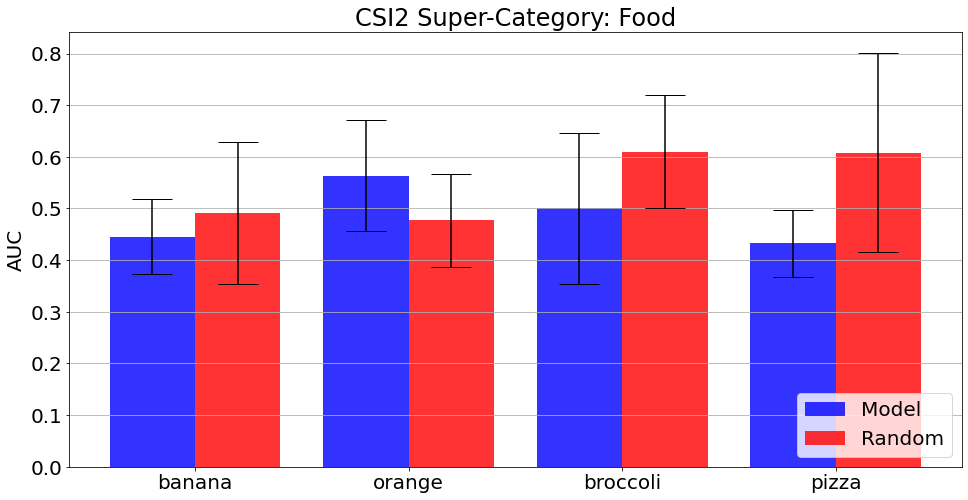

In [220]:
names = ['banana', 'orange', 'broccoli','pizza']
categories, categories_rand = food_fine, food_fine_rand
food2_fine, food2_fine_rand = food_fine, food_fine_rand
categories, categories_rand = np.transpose(categories), np.transpose(categories_rand)
CTEs, CTEs_rand, error, error_rand, x_pos = process(categories, categories_rand, names)
pvals_corrected = ttest(names, categories, categories_rand)
build_plot(CTEs, CTEs_rand, error, error_rand, x_pos, names, pvals_corrected, 'CSI2 Super-Category: Food', 'lower right')

handbag :
t-statistic: 2.665343754214498 p-value: 0.009233610737709326
baseball bat :
t-statistic: 0.9215323384183166 p-value: 0.18619037647108427
baseball glove :
t-statistic: 1.8084060392507382 p-value: 0.04603336324315583
tennis racket :
t-statistic: 0.6707380189227624 p-value: 0.25665076181044477
Bonferroni:

Reject: [ True False False False]
pvals corrected: [0.03693444 0.74476151 0.18413345 1.        ]
Benjamini/Hochberg:

Reject: [ True False False False]
pvals corrected: [0.03693444 0.24825384 0.09206673 0.25665076]


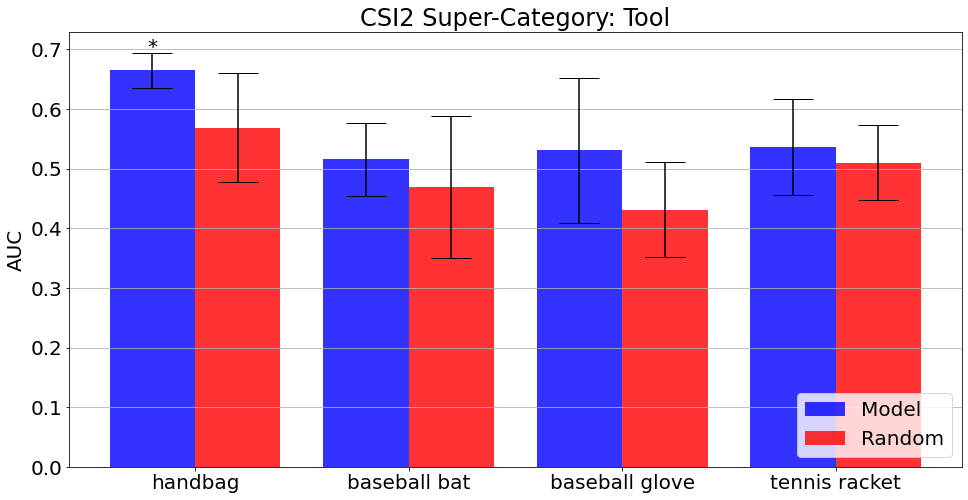

In [221]:
names = ['handbag', 'baseball bat', 'baseball glove', 'tennis racket']
categories, categories_rand = tool_fine, tool_fine_rand
tool2_fine, tool2_fine_rand = tool_fine, tool_fine_rand
categories, categories_rand = np.transpose(categories), np.transpose(categories_rand)
CTEs, CTEs_rand, error, error_rand, x_pos = process(categories, categories_rand, names)
pvals_corrected = ttest(names, categories, categories_rand)
build_plot(CTEs, CTEs_rand, error, error_rand, x_pos, names, pvals_corrected, 'CSI2 Super-Category: Tool', 'lower right')

In [222]:
# CSI3
vehicle_fine = [[0.46934864, 0.53026485, 0.44825268, 0.27777776], [0.59006214, 0.5214376, 0.6321961, 0.5416667],
 [0.5124199, 0.6556503, 0.69018817, 0.5053305], [0.46781605, 0.6767677, 0.5020161, 0.59068626],
 [0.45346937, 0.7020202, 0.5601563, 0.44273505], [0.46661666, 0.68087125, 0.34237075, 0.509375],
 [0.42585403, 0.6630591, 0.31240982, 0.5138593], [0.6571429, 0.37272727, 0.6515152, 0.45416665]]

vehicle_fine_rand = [[0.5409962, 0.53657, 0.3326613, 0.27705628], [0.5341615, 0.53215635, 0.46695098, 0.38104838],
                     [0.57411855, 0.48614073, 0.68279564, 0.70682305], [0.50996166, 0.5923521, 0.5033602, 0.5085784],
                     [0.5877551, 0.58441556, 0.5484375, 0.7205128], [0.37134284, 0.46875, 0.407314, 0.51874995],
                     [0.50504667, 0.39466086, 0.27128428, 0.31876335], [0.7285714, 0.5333333, 0.24242422, 0.6166667]]

animal_fine = [[0.5294118, 0.6049201, 0.8028302, 0.63881576], [0.4821782, 0.595485, 0.49089804, 0.70388347],
               [0.47039476, 0.5869338, 0.6606753, 0.6914983], [0.6078792, 0.61073947, 0.678398, 0.5524753],
               [0.4684028, 0.5922222, 0.6407967, 0.6240909], [0.46414474, 0.5935127, 0.74519235, 0.5947802],
               [0.5287128, 0.67046964, 0.54126215, 0.5961539], [0.50855654, 0.7053456, 0.48214287, 0.748]]

animal_fine_rand = [[0.571965, 0.46740958, 0.81792456, 0.5138158], [0.42277232, 0.47190636, 0.5157767, 0.4362864],
                    [0.4605263, 0.49721256, 0.64052284, 0.5601852], [0.5416053, 0.5554578, 0.5552184, 0.66534656],
                    [0.4965278, 0.5812963, 0.5398352, 0.5909091], [0.53881586, 0.5141477, 0.5968407, 0.46291208],
                    [0.280198, 0.48197752, 0.6092233, 0.50981164], [0.5427828, 0.434811, 0.90476185, 0.5153333]]

food_fine =[[0.5314815, 0.5438596, 0.6155914, 0.6706349], [0.64224136, 0.5535714, 0.52592593, 0.37575758],
            [0.515, 0.36333334, 0.6666667, 0.57974136], [0.15925927, 0.53666663, 0.43910256, 0.5689655],
            [0.16666667, 0.5416667, 0.43589747, 0.57974136], [0.4722222, 0.63095236, 0.5694445, 0.8636364]]

food_fine_rand = [[0.5055555, 0.37573096, 0.3629032, 0.6686508], [0.4375, 0.5238095, 0.4, 0.6272727],
                  [0.405, 0.4116667, 0.4555556, 0.77586204], [0.5648148, 0.415, 0.5416667, 0.54094833],
                  [0.6407407, 0.56, 0.35576925, 0.37284485], [0.41666666, 0.64285713, 0.25, 0.40909094]]

tool_fine = [[0.70321643, 0.6637931, 0.6111111, 0.602381], [0.65993786, 0.6271552, 0.66166663, 0.56296295],
             [0.4809942, 0.54999995, 0.5833333, 0.4246032], [0.6458334, 0.63577586, 0.7285714, 0.54999995],
             [0.6294643, 0.6767242, 0.6166666, 0.5404762], [0.5297619, 0.6448413, 0.50961536, 0.41666663],
             [0.60064936, 0.5701754, 0.4375, 0.5595238], [0.6168831, 0.5745614, 0.4375, 0.57539684]]
tool_fine_rand = [[0.53070176, 0.43965518, 0.43849206, 0.4714286], [0.5667702, 0.48060343, 0.49, 0.7074074],
                  [0.55701756, 0.62857145, 0.60515875, 0.48214287], [0.38392857, 0.47198278, 0.25, 0.5238095],
                  [0.49255952, 0.43965518, 0.27380952, 0.4690476], [0.42410713, 0.40079367, 0.44070515, 0.3763441],
                  [0.47727275, 0.61403507, 0.6397059, 0.6111111], [0.39610392, 0.60087717, 0.7169118, 0.7261905]]

car :
t-statistic: -0.8606118025448067 p-value: 0.20197503487637647
airplane :
t-statistic: 1.8065648736103883 p-value: 0.046183016870707354
train :
t-statistic: 1.1767237859796313 p-value: 0.1294630151866045
boat :
t-statistic: -0.38741833368521733 p-value: 0.3521362532381843
Bonferroni:

Reject: [False False False False]
pvals corrected: [0.80790014 0.18473207 0.51785206 1.        ]
Benjamini/Hochberg:

Reject: [False False False False]
pvals corrected: [0.26930005 0.18473207 0.25892603 0.35213625]


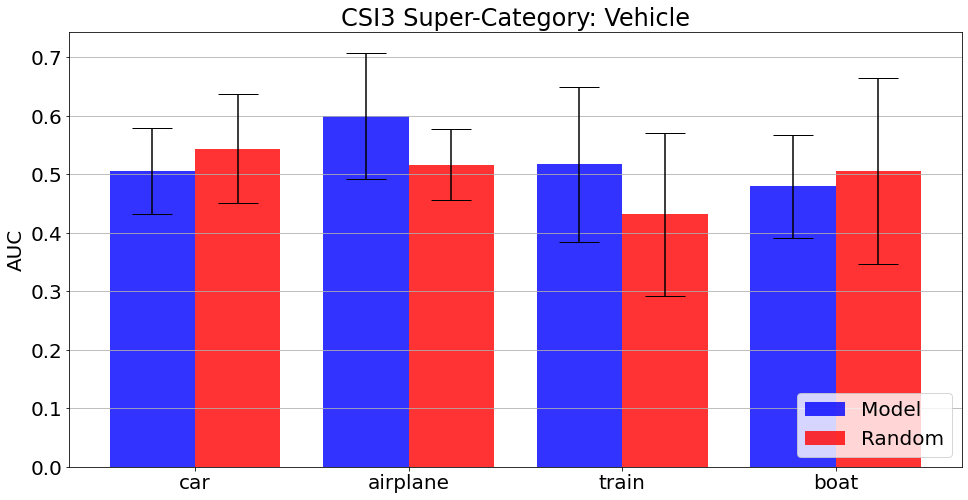

In [223]:
names = ['car', 'airplane', 'train', 'boat']
categories, categories_rand = vehicle_fine, vehicle_fine_rand
vehicle3_fine, vehicle3_fine_rand = vehicle_fine, vehicle_fine_rand
categories, categories_rand = np.transpose(categories), np.transpose(categories_rand)
CTEs, CTEs_rand, error, error_rand, x_pos = process(categories, categories_rand, names)
pvals_corrected = ttest(names, categories, categories_rand)
build_plot(CTEs, CTEs_rand, error, error_rand, x_pos, names, pvals_corrected,
           'CSI3 Super-Category: Vehicle', 'lower right')

bird :
t-statistic: 0.6766738149446095 p-value: 0.25481964086704106
dog :
t-statistic: 5.1921018940168215 p-value: 6.827195770978902e-05
horse :
t-statistic: -0.26759829487073217 p-value: 0.39645527808504016
giraffe :
t-statistic: 3.2287033682304562 p-value: 0.0030321268741129504
Bonferroni:

Reject: [False  True False  True]
pvals corrected: [1.00000000e+00 2.73087831e-04 1.00000000e+00 1.21285075e-02]
Benjamini/Hochberg:

Reject: [False  True False  True]
pvals corrected: [3.39759521e-01 2.73087831e-04 3.96455278e-01 6.06425375e-03]


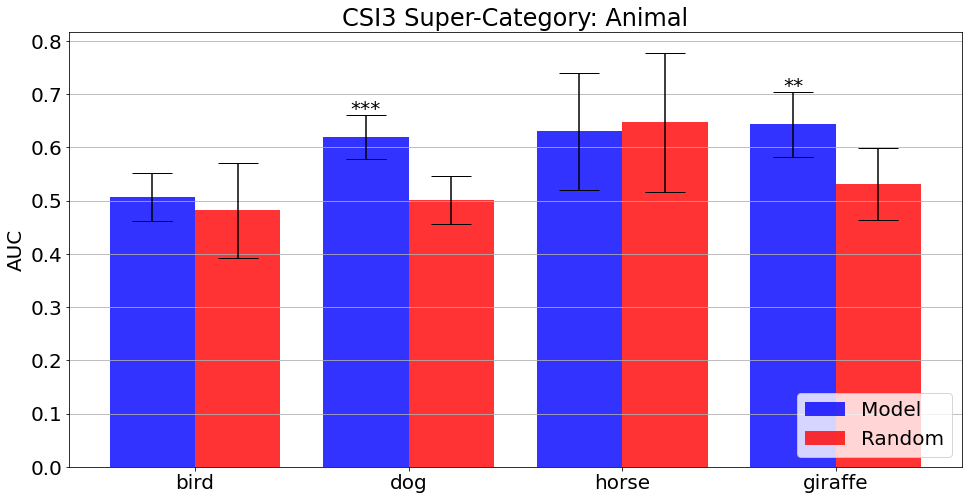

In [224]:
names = ['bird', 'dog', 'horse', 'giraffe']
categories, categories_rand = animal_fine, animal_fine_rand
animal3_fine, animal3_fine_rand = animal_fine, animal_fine_rand
categories, categories_rand = np.transpose(categories), np.transpose(categories_rand)
CTEs, CTEs_rand, error, error_rand, x_pos = process(categories, categories_rand, names)
pvals_corrected = ttest(names, categories, categories_rand)
build_plot(CTEs, CTEs_rand, error, error_rand, x_pos, names, pvals_corrected, 'CSI3 Super-Category: Animal', 'lower right')

banana :
t-statistic: -0.8837779753114595 p-value: 0.19878294438788802
orange :
t-statistic: 0.7210313494191829 p-value: 0.24370220782232715
broccoli :
t-statistic: 2.6599633291867253 p-value: 0.011950395600329079
pizza :
t-statistic: 0.44763825450754113 p-value: 0.3319775640856396
Bonferroni:

Reject: [False False  True False]
pvals corrected: [0.79513178 0.97480883 0.04780158 1.        ]
Benjamini/Hochberg:

Reject: [False False  True False]
pvals corrected: [0.32493628 0.32493628 0.04780158 0.33197756]


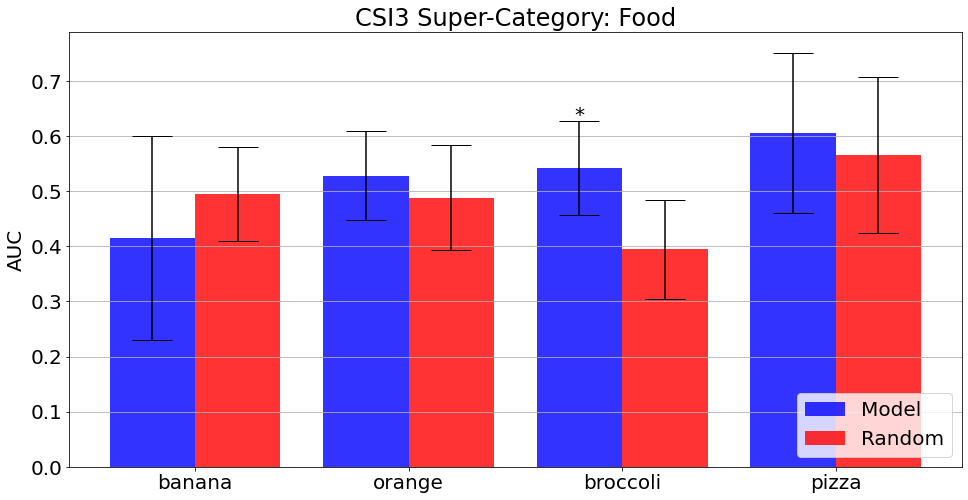

In [225]:
names = ['banana', 'orange', 'broccoli','pizza']
categories, categories_rand = food_fine, food_fine_rand
food3_fine, food3_fine_rand = food_fine, food_fine_rand
categories, categories_rand = np.transpose(categories), np.transpose(categories_rand)
CTEs, CTEs_rand, error, error_rand, x_pos = process(categories, categories_rand, names)
pvals_corrected = ttest(names, categories, categories_rand)
build_plot(CTEs, CTEs_rand, error, error_rand, x_pos, names, pvals_corrected, 'CSI3 Super-Category: Food', 'lower right')

handbag :
t-statistic: 3.629326754220604 p-value: 0.0013673394226393484
baseball bat :
t-statistic: 3.0066049678719584 p-value: 0.004713636583247517
baseball glove :
t-statistic: 1.310657819504621 p-value: 0.10553382090830317
tennis racket :
t-statistic: -0.3371054137624533 p-value: 0.37051896698604847
Bonferroni:

Reject: [ True  True False False]
pvals corrected: [0.00546936 0.01885455 0.42213528 1.        ]
Benjamini/Hochberg:

Reject: [ True  True False False]
pvals corrected: [0.00546936 0.00942727 0.14071176 0.37051897]


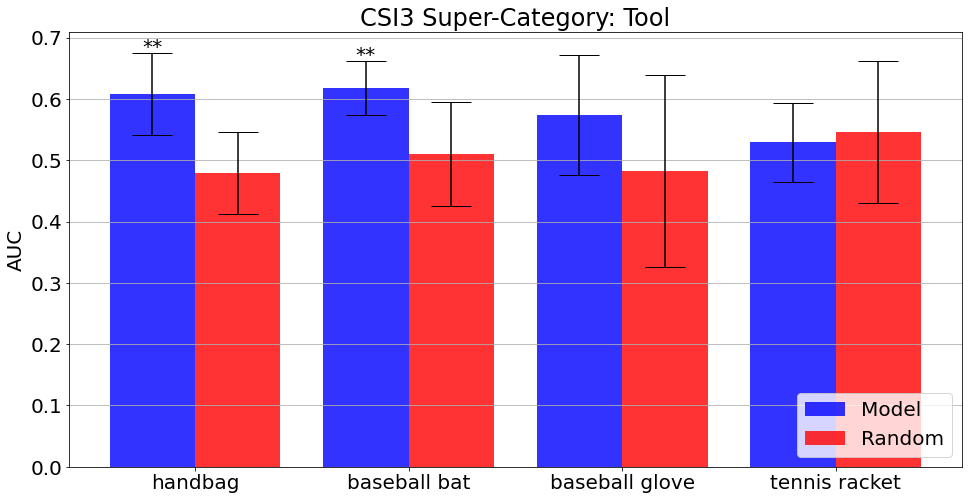

In [226]:
names = ['handbag', 'baseball bat', 'baseball glove', 'tennis racket']
categories, categories_rand = tool_fine, tool_fine_rand
tool3_fine, tool3_fine_rand = tool_fine, tool_fine_rand
categories, categories_rand = np.transpose(categories), np.transpose(categories_rand)
CTEs, CTEs_rand, error, error_rand, x_pos = process(categories, categories_rand, names)
pvals_corrected = ttest(names, categories, categories_rand)
build_plot(CTEs, CTEs_rand, error, error_rand, x_pos, names, pvals_corrected, 'CSI3 Super-Category: Tool', 'lower right')

In [227]:
# CSI4
vehicle_fine = [[0.8, 0.64772725, 0.5539216, 0.55288464], [0.475, 0.50806457, 0.55172414, 0.38125],
                [0.5272727, 0.56681037, 0.43560606, 0.5098039], [0.39242426, 0.62812495, 0.5357143, 1.0],
                [0.52403843, 0.6999999, 0.48888886, 0.2785714], [0.3690476, 0.48333332, 0.43010756, 0.7025862],
                [0.60999995, 0.6210317, 0.59999996, 0.53787875], [0.2077922, 0.28125, 0.0, 0.21428572]]
vehicle_fine_rand = [[0.6314815, 0.41666666, 0.4754902, 0.38141024], [0.4583333, 0.39247313, 0.38577583, 0.465625],
                     [0.78181815, 0.4051724, 0.62121207, 0.23039217], [0.36515152, 0.553125, 0.57857144, 0.9722222],
                     [0.5721154, 0.67142856, 0.5740741, 0.12857142], [0.4404762, 0.4357143, 0.59408605, 0.7090517],
                     [0.40333334, 0.6051587, 0.48095235, 0.7272727], [0.6298701, 0.234375, 0.0, 0.29464284]]
animal_fine = [[0.33828127, 0.60826933, 0.52028984, 0.60892856], [0.55194813, 0.58184135, 0.484058, 0.6215352],
               [0.3225108, 0.5295454, 0.29452056, 0.48284316], [0.6755953, 0.62325174, 0.51449275, 0.64818764],
               [0.6577381, 0.5370833, 0.7605634, 0.7034188], [0.5404412, 0.61024845, 0.7107844, 0.57142854],
               [0.4952957, 0.5697674, 0.7101449, 0.3795309], [0.37421387, 0.667027, 0.85775864, 0.5506494]]
animal_fine_rand = [[0.6296875, 0.52983797, 0.16666666, 0.71845233], [0.5483406, 0.49445862, 0.48115942, 0.46695095],
                    [0.49422798, 0.5034091, 0.85616434, 0.38112748], [0.53154767, 0.6005245, 0.57391304, 0.38272923],
                    [0.5440476, 0.47166666, 0.471831, 0.56495726], [0.37990198, 0.57259315, 0.6458333, 0.51785713],
                    [0.5833334, 0.5746436, 0.34202898, 0.42217487], [0.6561845, 0.5616216, 0.67672414, 0.50909096]]
food_fine = [[0.55967605, 0.51722753, 0.4636119, 0.49515086], [0.655, 0.46296299, 0.22222225, 0.42884615]]

food_fine_rand = [[0.3964194, 0.41826922, 0.49550766, 0.3965517], [0.405, 0.5925926, 0.26157406, 0.48461542]]
tool_fine = [[0.51754385, 0.35215053, 0.40873015, 0.67672414], [0.41815472, 0.5689656, 0.4611111, 0.32954544],
             [0.4181548, 0.6422414, 0.4259259, 0.26893938], [0.37426898, 0.62096775, 0.5883621, 0.545], 
             [0.380117, 0.5806452, 0.64008623, 0.52833337], [0.44444445, 0.5555556, 0.75, 0.6875],
             [0.29629633, 0.5555556, 0.71875, 0.6875], [0.5925926, 0.5555556, 0.8125, 0.6875]]
tool_fine_rand = [[0.33771932, 0.5107527, 0.5595238, 0.35560346], [0.6220238, 0.67025864, 0.55185187, 0.40151513],
                  [0.4077381, 0.37715518, 0.5037037, 0.22727272], [0.7149123, 0.56989247, 0.5086207, 0.59333336],
                  [0.5482456, 0.6317204, 0.6530172, 0.525], [0.14814815, 0.38888887, 0.59375, 0.59375],
                  [0.2962963, 0.962963, 0.625, 0.75], [0.2777778, 0.6481482, 0.75, 0.359375]]

car :
t-statistic: -0.5888716349815726 p-value: 0.282664231173929
airplane :
t-statistic: 1.3326717581293703 p-value: 0.10196203930708343
train :
t-statistic: -0.14479057238861223 p-value: 0.44347000198546865
boat :
t-statistic: 0.24809497611081727 p-value: 0.4038314582973749
Bonferroni:

Reject: [False False False False]
pvals corrected: [1.         0.40784816 1.         1.        ]
Benjamini/Hochberg:

Reject: [False False False False]
pvals corrected: [0.44347    0.40784816 0.44347    0.44347   ]


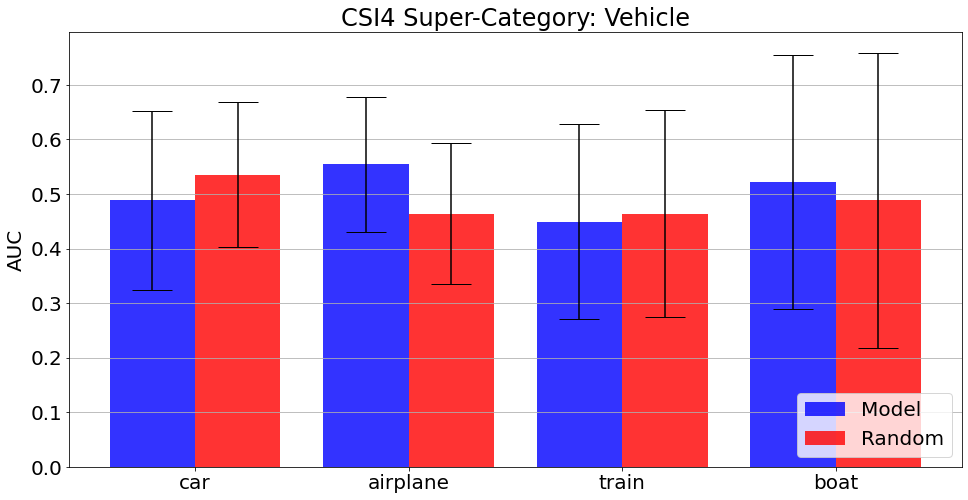

In [228]:
names = ['car', 'airplane', 'train', 'boat']
categories, categories_rand = vehicle_fine, vehicle_fine_rand
vehicle4_fine, vehicle4_fine_rand = vehicle_fine, vehicle_fine_rand
categories, categories_rand = np.transpose(categories), np.transpose(categories_rand)
CTEs, CTEs_rand, error, error_rand, x_pos = process(categories, categories_rand, names)
pvals_corrected = ttest(names, categories, categories_rand)
build_plot(CTEs, CTEs_rand, error, error_rand, x_pos, names, pvals_corrected,
           'CSI4 Super-Category: Vehicle', 'lower right')

bird :
t-statistic: -0.8959963251570183 p-value: 0.1927010587747333
dog :
t-statistic: 2.286947974969268 p-value: 0.019142745616688297
horse :
t-statistic: 0.8029039859187076 p-value: 0.21772489634337355
giraffe :
t-statistic: 1.412605183543729 p-value: 0.08980762806856325
Bonferroni:

Reject: [False False False False]
pvals corrected: [0.77080424 0.07657098 0.87089959 0.35923051]
Benjamini/Hochberg:

Reject: [False False False False]
pvals corrected: [0.2177249  0.07657098 0.2177249  0.17961526]


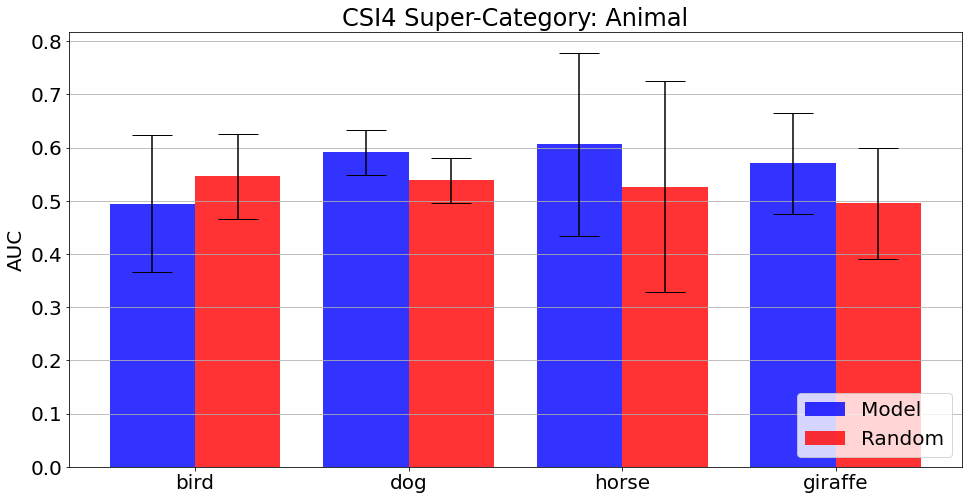

In [229]:
names = ['bird', 'dog', 'horse', 'giraffe']
categories, categories_rand = animal_fine, animal_fine_rand
animal4_fine, animal4_fine_rand = animal_fine, animal_fine_rand
categories, categories_rand = np.transpose(categories), np.transpose(categories_rand)
CTEs, CTEs_rand, error, error_rand, x_pos = process(categories, categories_rand, names)
pvals_corrected = ttest(names, categories, categories_rand)
build_plot(CTEs, CTEs_rand, error, error_rand, x_pos, names, pvals_corrected, 'CSI4 Super-Category: Animal', 'lower right')

banana :
t-statistic: 4.317828868888192 p-value: 0.02483742523806553
orange :
t-statistic: -0.16799376036283592 p-value: 0.44101991127888496
broccoli :
t-statistic: -0.21195446613711227 p-value: 0.42589049430428627
pizza :
t-statistic: 0.38853613658769776 p-value: 0.36753985642638287
Bonferroni:

Reject: [False False False False]
pvals corrected: [0.0993497 1.        1.        1.       ]
Benjamini/Hochberg:

Reject: [False False False False]
pvals corrected: [0.0993497  0.44101991 0.44101991 0.44101991]


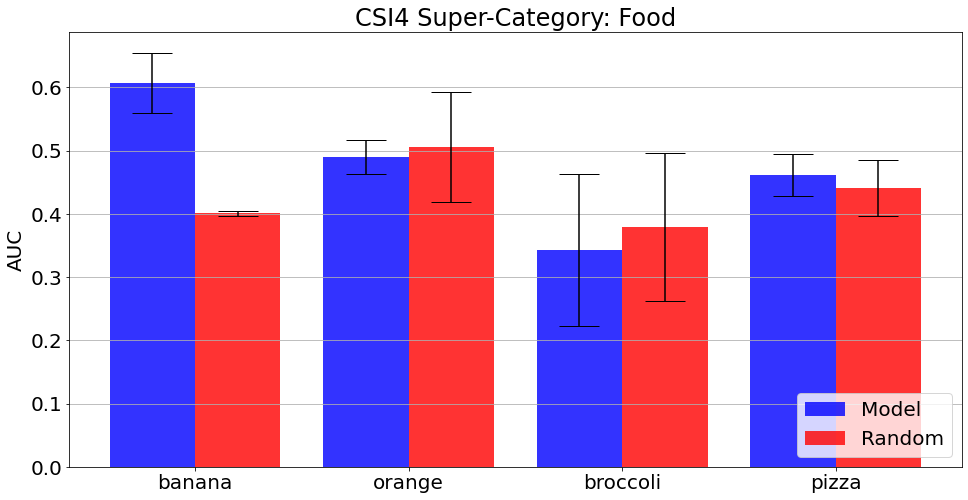

In [230]:
names = ['banana', 'orange', 'broccoli','pizza']
categories, categories_rand = food_fine, food_fine_rand
food4_fine, food4_fine_rand = food_fine, food_fine_rand
categories, categories_rand = np.transpose(categories), np.transpose(categories_rand)
CTEs, CTEs_rand, error, error_rand, x_pos = process(categories, categories_rand, names)
pvals_corrected = ttest(names, categories, categories_rand)
build_plot(CTEs, CTEs_rand, error, error_rand, x_pos, names, pvals_corrected, 'CSI4 Super-Category: Food', 'lower right')

handbag :
t-statistic: 0.14700505144827966 p-value: 0.4426120080549712
baseball bat :
t-statistic: -0.563369749880379 p-value: 0.2910473332898681
baseball glove :
t-statistic: 0.12051947260193036 p-value: 0.45289210968741717
tennis racket :
t-statistic: 0.893450891679995 p-value: 0.19335841955757277
Bonferroni:

Reject: [False False False False]
pvals corrected: [1.         1.         1.         0.77343368]
Benjamini/Hochberg:

Reject: [False False False False]
pvals corrected: [0.45289211 0.45289211 0.45289211 0.45289211]


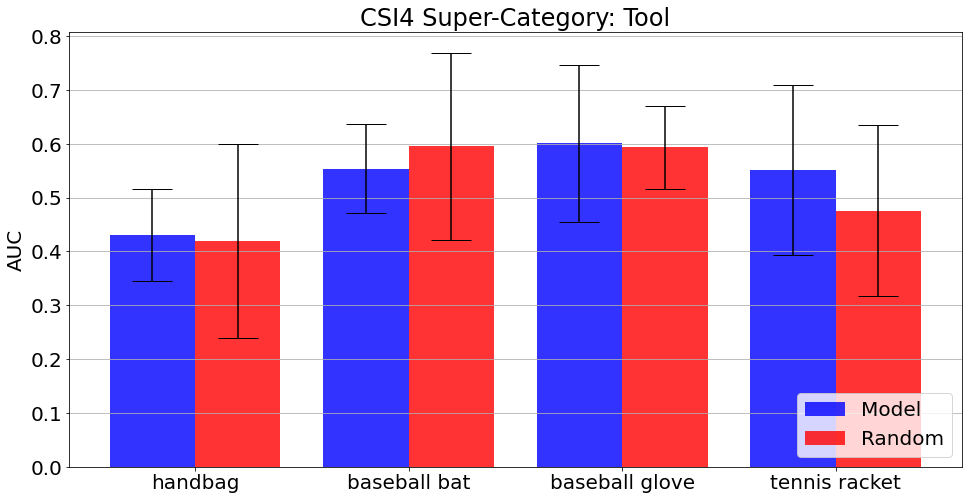

In [231]:
names = ['handbag', 'baseball bat', 'baseball glove', 'tennis racket']
categories, categories_rand = tool_fine, tool_fine_rand
tool4_fine, tool4_fine_rand = tool_fine, tool_fine_rand
categories, categories_rand = np.transpose(categories), np.transpose(categories_rand)
CTEs, CTEs_rand, error, error_rand, x_pos = process(categories, categories_rand, names)
pvals_corrected = ttest(names, categories, categories_rand)
build_plot(CTEs, CTEs_rand, error, error_rand, x_pos, names, pvals_corrected, 'CSI4 Super-Category: Tool', 'lower right')

In [232]:
vehicle_avg = (np.array(vehicle1_fine)+np.array(vehicle2_fine)+np.array(vehicle3_fine)+np.array(vehicle4_fine))/4
vehicle_avg_rand = (np.array(vehicle1_fine_rand)+np.array(vehicle2_fine_rand)+np.array(vehicle3_fine_rand)+
                    np.array(vehicle4_fine_rand))/4
animal_avg = (np.array(animal1_fine)+np.array(animal2_fine)+np.array(animal3_fine)+np.array(animal4_fine))/4
animal_avg_rand = (np.array(animal1_fine_rand)+np.array(animal2_fine_rand)+np.array(animal3_fine_rand)+
                    np.array(animal4_fine_rand))/4 
food_avg = (np.array(food1_fine)[:2,:]+np.array(food2_fine)[:2,:]+np.array(food3_fine)[:2,:]+np.array(food4_fine))/4
food_avg_rand = (np.array(food1_fine_rand)[:2,:]+np.array(food2_fine_rand)[:2,:]+np.array(food3_fine_rand)[:2,:]+
                    np.array(food4_fine_rand))/4 
tool_avg = (np.array(tool1_fine)+np.array(tool2_fine)+np.array(tool3_fine)+np.array(tool4_fine))/4
tool_avg_rand = (np.array(tool1_fine_rand)+np.array(tool2_fine_rand)+np.array(tool3_fine_rand)+
                    np.array(tool4_fine_rand))/4 

car :
t-statistic: 1.1800829381503914 p-value: 0.12881534965913818
airplane :
t-statistic: 2.741562023723503 p-value: 0.007953146598916772
train :
t-statistic: 2.3828505763036802 p-value: 0.015949413685563473
boat :
t-statistic: 1.9164949274440206 p-value: 0.037972618497648755
Bonferroni:

Reject: [False  True False False]
pvals corrected: [0.5152614  0.03181259 0.06379765 0.15189047]
Benjamini/Hochberg:

Reject: [False  True  True False]
pvals corrected: [0.12881535 0.03181259 0.03189883 0.05063016]


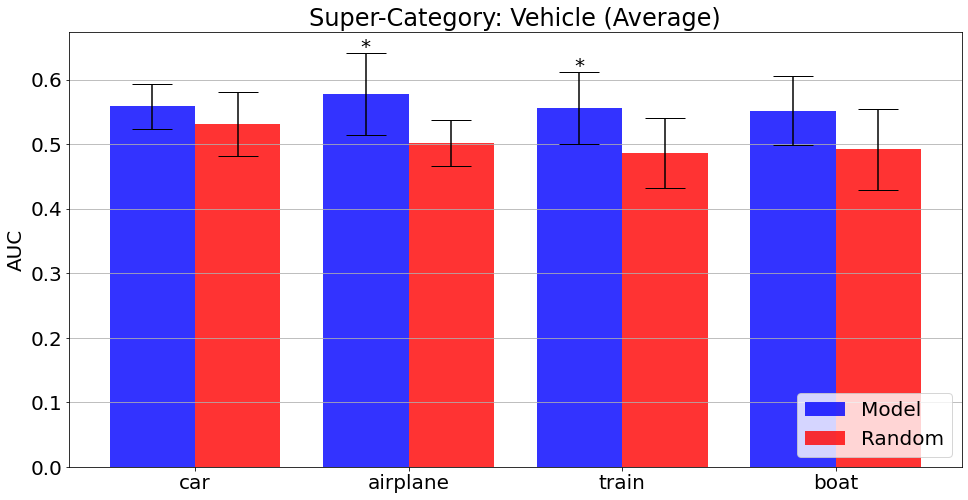

In [233]:
names = ['car', 'airplane', 'train', 'boat']
categories, categories_rand = vehicle_avg, vehicle_avg_rand
categories, categories_rand = np.transpose(categories), np.transpose(categories_rand)
CTEs, CTEs_rand, error, error_rand, x_pos = process(categories, categories_rand, names)
pvals_corrected = ttest(names, categories, categories_rand)
build_plot(CTEs, CTEs_rand, error, error_rand, x_pos, names, pvals_corrected,
           'Super-Category: Vehicle (Average)', 'lower right')

bird :
t-statistic: 1.1172927882852266 p-value: 0.14133852822353174
dog :
t-statistic: 6.435095161631823 p-value: 7.80378617983317e-06
horse :
t-statistic: 2.052286046248576 p-value: 0.029664846344978152
giraffe :
t-statistic: 3.7577258838934315 p-value: 0.0010603720331763362
Bonferroni:

Reject: [False  True False  True]
pvals corrected: [5.65354113e-01 3.12151447e-05 1.18659385e-01 4.24148813e-03]
Benjamini/Hochberg:

Reject: [False  True  True  True]
pvals corrected: [1.41338528e-01 3.12151447e-05 3.95531285e-02 2.12074407e-03]


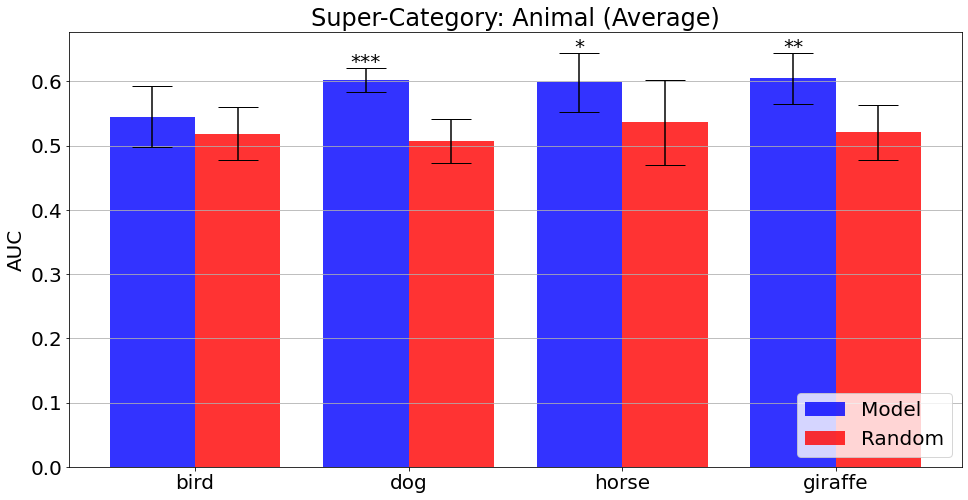

In [234]:
names = ['bird', 'dog', 'horse', 'giraffe']
categories, categories_rand = animal_avg, animal_avg_rand
categories, categories_rand = np.transpose(categories), np.transpose(categories_rand)
CTEs, CTEs_rand, error, error_rand, x_pos = process(categories, categories_rand, names)
pvals_corrected = ttest(names, categories, categories_rand)
build_plot(CTEs, CTEs_rand, error, error_rand, x_pos, names, pvals_corrected,
           'Super-Category: Animal (Average)', 'lower right')

banana :
t-statistic: 2.5871545014148296 p-value: 0.06126899508732011
orange :
t-statistic: -0.05092822276671364 p-value: 0.4820058181883635
broccoli :
t-statistic: 2.408884994014223 p-value: 0.06881577185110056
pizza :
t-statistic: -0.25623537400983465 p-value: 0.41085848097577315
Bonferroni:

Reject: [False False False False]
pvals corrected: [0.24507598 1.         0.27526309 1.        ]
Benjamini/Hochberg:

Reject: [False False False False]
pvals corrected: [0.13763154 0.48200582 0.13763154 0.48200582]


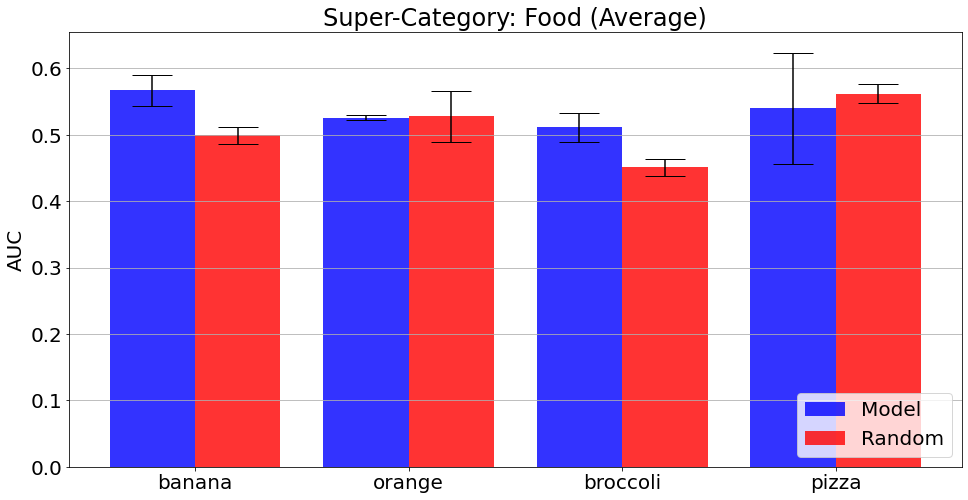

In [237]:
names = ['banana', 'orange', 'broccoli','pizza']
categories, categories_rand = food_avg, food_avg_rand
categories, categories_rand = np.transpose(categories), np.transpose(categories_rand)
CTEs, CTEs_rand, error, error_rand, x_pos = process(categories, categories_rand, names)
pvals_corrected = ttest(names, categories, categories_rand)
build_plot(CTEs, CTEs_rand, error, error_rand, x_pos, names, pvals_corrected,
           'Super-Category: Food (Average)', 'lower right')

handbag :
t-statistic: 3.7776703571496846 p-value: 0.0010193875967694417
baseball bat :
t-statistic: 2.229395923455119 p-value: 0.021339144412008976
baseball glove :
t-statistic: 3.650580205540778 p-value: 0.0013109206958472662
tennis racket :
t-statistic: 0.8398966685886555 p-value: 0.20753984964309752
Bonferroni:

Reject: [ True False  True False]
pvals corrected: [0.00407755 0.08535658 0.00524368 0.8301594 ]
Benjamini/Hochberg:

Reject: [ True  True  True False]
pvals corrected: [0.00262184 0.02845219 0.00262184 0.20753985]


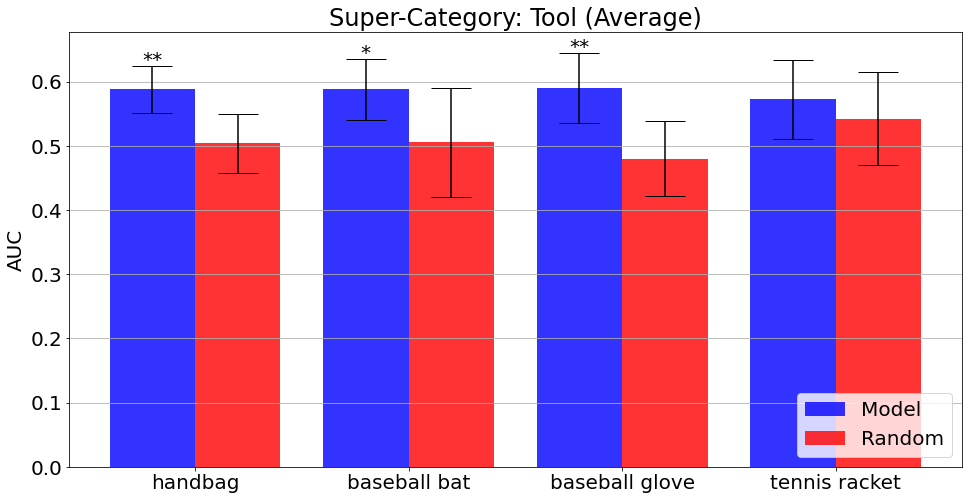

In [238]:
names = ['handbag', 'baseball bat', 'baseball glove', 'tennis racket']
categories, categories_rand = tool_avg, tool_avg_rand
categories, categories_rand = np.transpose(categories), np.transpose(categories_rand)
CTEs, CTEs_rand, error, error_rand, x_pos = process(categories, categories_rand, names)
pvals_corrected = ttest(names, categories, categories_rand)
build_plot(CTEs, CTEs_rand, error, error_rand, x_pos, names, pvals_corrected,
           'Super-Category: Tool (Average)', 'lower right')